In [ ]:
from IPython import display
display.clear_output()

import supervision as sv
import ultralytics
import cv2
ultralytics.checks()

In [15]:
import os
cwd = os.getcwd()
HOME = os.path.join(cwd, '..')

In [ ]:
import os
import dotenv
from roboflow import Roboflow

cwd = os.getcwd()
env_path = os.path.join(HOME, '.env')
dotenv.load_dotenv(dotenv_path=env_path)

ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_API_KEY')

dataset_path = os.path.join(HOME, 'datasets', 'dump-truck-detection')

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("materialsbank").project("dump-truck-detection")
dataset = project.version(1).download(model_format="yolov8", location=dataset_path)

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=weights/yolo/yolov8n.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

Cuando el entrenamiento termina, el modelo se encuentra dentro 
de una carpeta que se llama `weights` y deberia de haber 2 modelos:

- best.pt: el que mejor puntaje obtuvo
- last.pt: la ultima iteracion que se entreno

Por ejemplo:

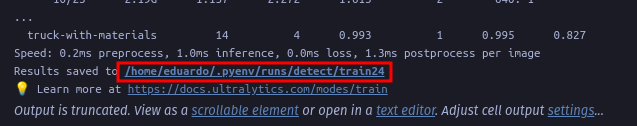

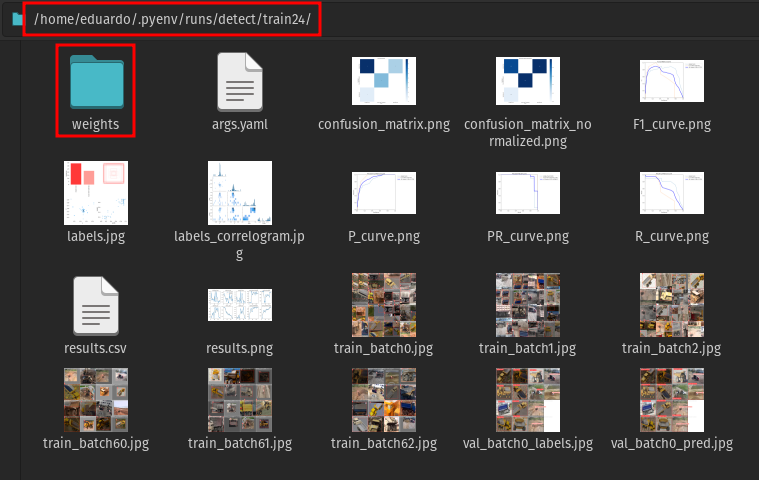

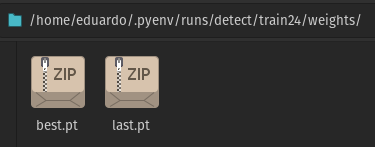

In [13]:
display.display(display.Image(f"{HOME}/assets/training-output.png", width=600))
display.display(display.Image(f"{HOME}/assets/training-output-folder.png", width=600))
display.display(display.Image(f"{HOME}/assets/weight-files.png", width=600))